# ***Titanic Exploratry Data Anaylsis***

***Import Necessary Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Load the Titanic Dataset***

In [2]:
titanic_df = pd.read_csv('titanic.csv')

***Statatical Analysis***

In [3]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# ***Data Preprocessing***

* ***Check for missing values***

In [6]:
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


* ***Handle missing values and Fill missing values in 'Age' with the median age***

In [7]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

* ***Fill missing values in 'Embarked' with the most common value***

In [8]:
most_common_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(most_common_embarked, inplace=True)

* ***Drop 'Cabin' column as it has too many missing values***

In [9]:
titanic_df.drop(columns=['Cabin'], inplace=True)

# ***Explore relationships between variables***

***Relationship between 'Pclass' and 'Survived'***

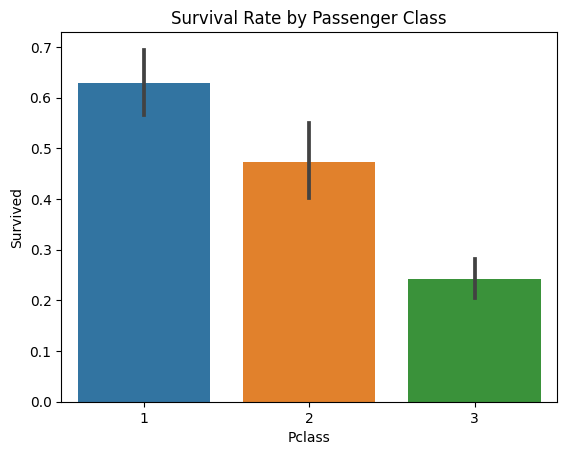

In [11]:

sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

***Relationship between 'Sex' and 'Survived'***

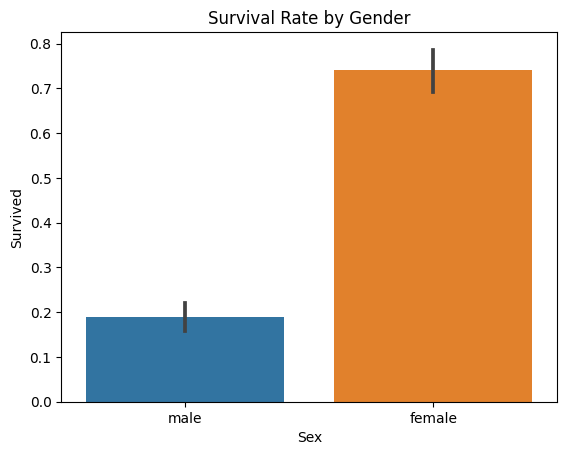

In [12]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.show()

***Relationship between 'Age' and 'Survived'***

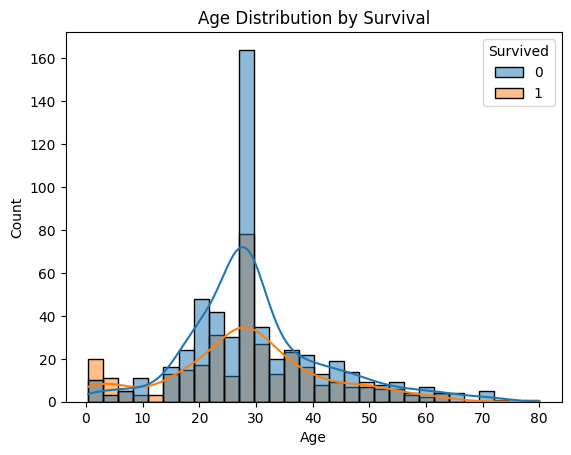

In [13]:
sns.histplot(data=titanic_df, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

***Relationship between 'SibSp' (number of siblings/spouses) and 'Survived'***

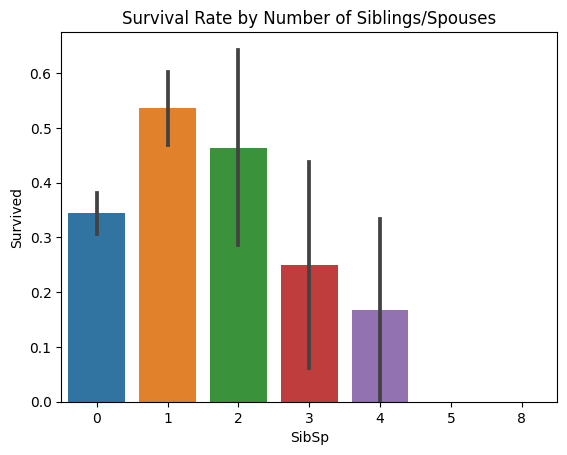

In [14]:
sns.barplot(x='SibSp', y='Survived', data=titanic_df)
plt.title('Survival Rate by Number of Siblings/Spouses')
plt.show()


***Relationship between 'Parch' (number of parents/children) and 'Survived'***

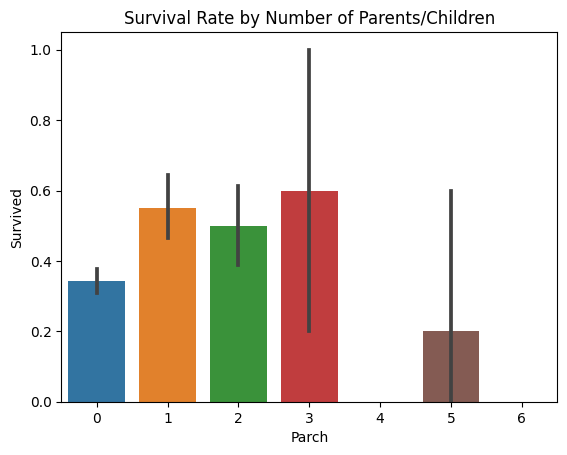

In [15]:
sns.barplot(x='Parch', y='Survived', data=titanic_df)
plt.title('Survival Rate by Number of Parents/Children')
plt.show()

***Relationship between 'Embarked' and 'Survived'***

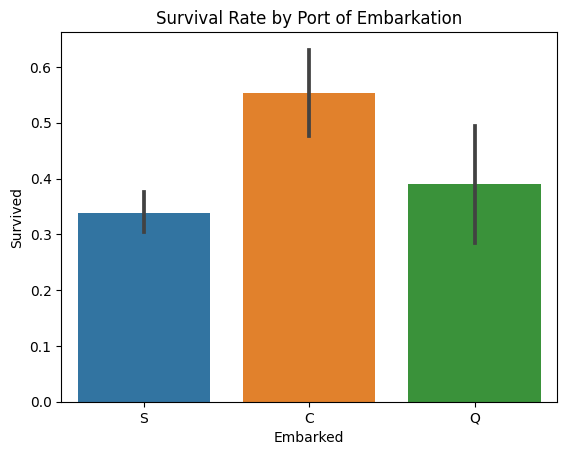

In [16]:
sns.barplot(x='Embarked', y='Survived', data=titanic_df)
plt.title('Survival Rate by Port of Embarkation')
plt.show()

***Fare Distribution by Class***

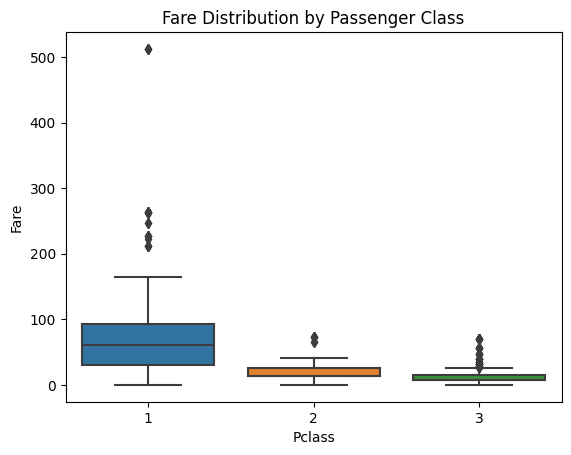

In [17]:
sns.boxplot(x='Pclass', y='Fare', data=titanic_df)
plt.title('Fare Distribution by Passenger Class')
plt.show()

***Survival Rate by Age and Class***

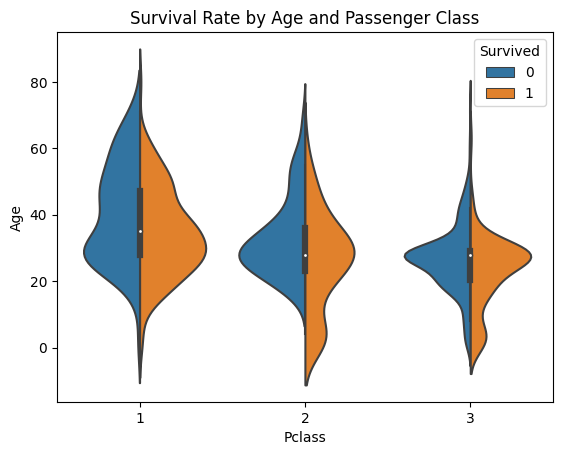

In [15]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_df, split=True)
plt.title('Survival Rate by Age and Passenger Class')
plt.show()

***Survival Rate by Gender and Class***

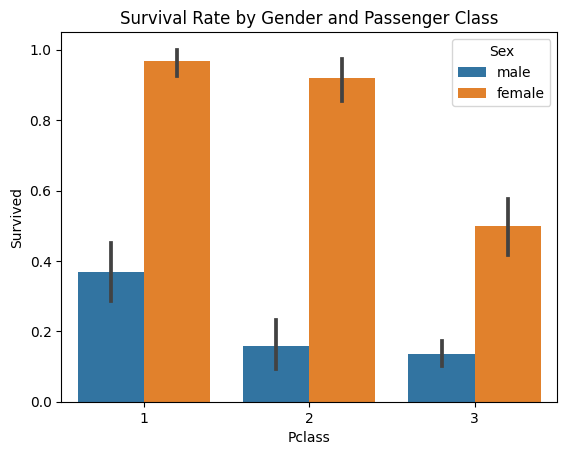

In [16]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
plt.title('Survival Rate by Gender and Passenger Class')
plt.show()

***Family Size vs Survival***

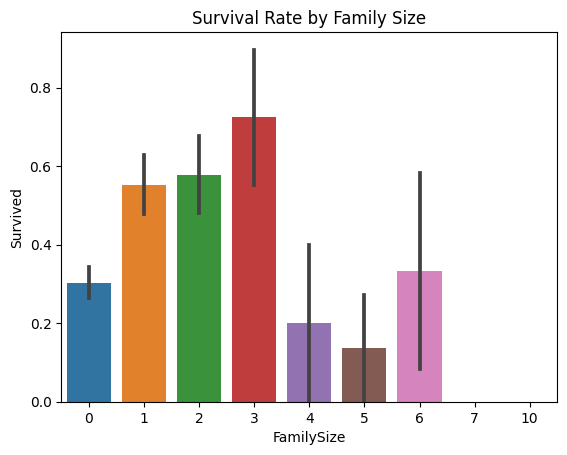

In [19]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']
sns.barplot(x='FamilySize', y='Survived', data=titanic_df)
plt.title('Survival Rate by Family Size')
plt.show()

***Survival Rate by Embarked and Class***

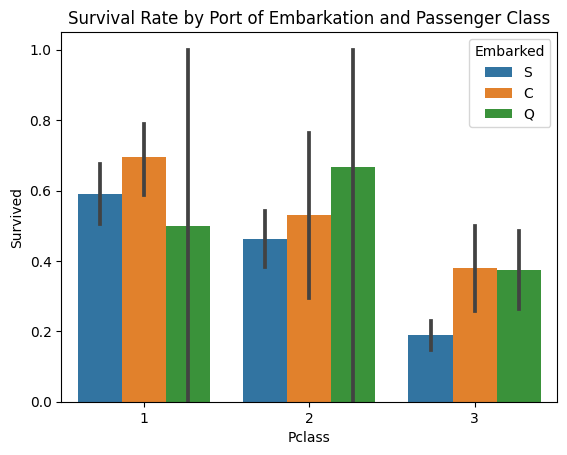

In [20]:
sns.barplot(x='Pclass', y='Survived', hue='Embarked', data=titanic_df)
plt.title('Survival Rate by Port of Embarkation and Passenger Class')
plt.show()

***Age Distribution by Gender***

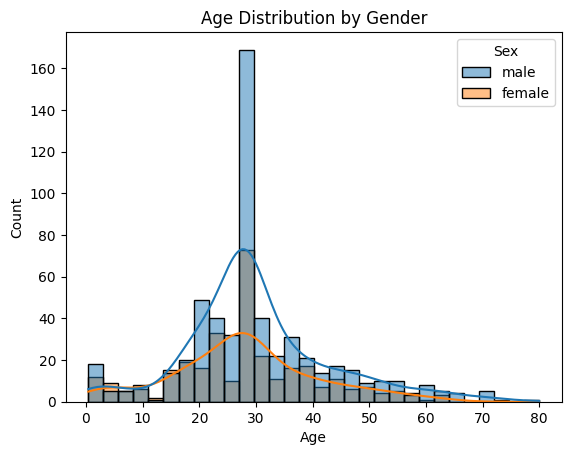

In [21]:
sns.histplot(data=titanic_df, x='Age', hue='Sex', kde=True)
plt.title('Age Distribution by Gender')
plt.show()

***Survival Rate by Fare Range***

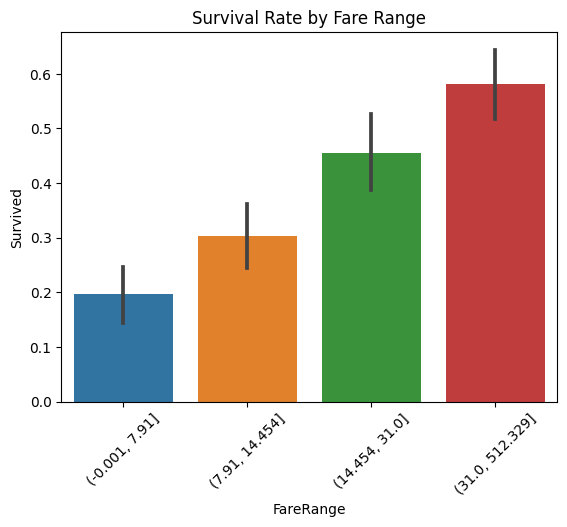

In [22]:
titanic_df['FareRange'] = pd.qcut(titanic_df['Fare'], q=4)
sns.barplot(x='FareRange', y='Survived', data=titanic_df)
plt.title('Survival Rate by Fare Range')
plt.xticks(rotation=45)
plt.show()

***Correlation Heatmap***

In [23]:
numerical_columns = titanic_df.select_dtypes(include=[np.number])
corr_matrix = numerical_columns.corr()

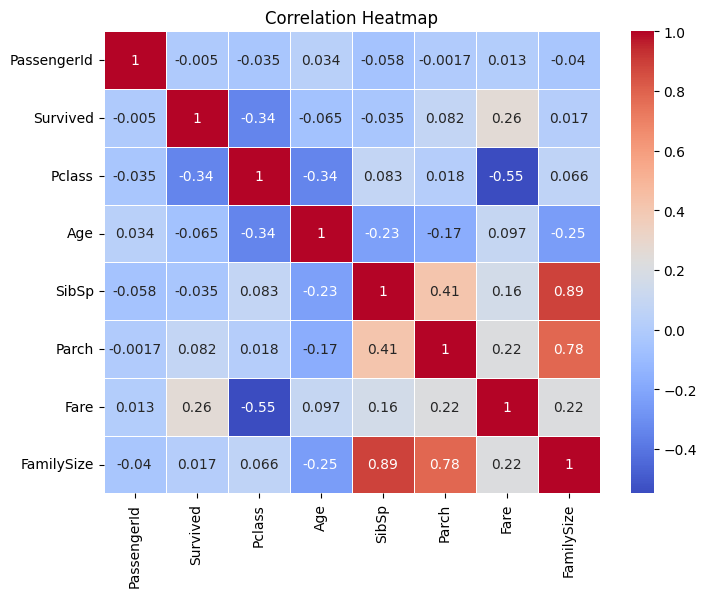

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

***Summary statistics***

In [25]:
summary_stats = titanic_df.describe()
print(summary_stats)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  FamilySize  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    0.904602  
std      0.806057   49.693429    1.613459  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.910400    0.000000  
50%      0.000000   14.454200    0.000000  
75%      0.000000   31.000000    1.000000  
max      6.000000

**Conclusion:** 

These insights can inform further analyses, such as predictive modeling.Titanic EDA serves as a critical step before building predictive models to understand the dataset's nuances and discover meaningful patterns. It aids in making informed decisions and crafting hypotheses for more advanced analyses.